In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [2]:
class VariableState(TypedDict):

    a:float
    b:float
    c:float

    determinant:float
    result:str
    equation:str


In [5]:
def show_equation(state:VariableState):

    equation = f'({state["a"]})x2+({state["b"]})x+({state["c"]})'

    return {'equation' : equation}

def calculate_determinant(state:VariableState):

    determinant = ((state["b"])**2)-(4*state["a"]*state["c"])

    return {"determinant":determinant}

def real_roots(state: VariableState):

    root1 = (-state["b"]+(state["determinant"])**0.5)/(2*state["a"])
    root2 = (-state["b"]-(state["determinant"])**0.5)/(2*state["a"])

    result = f"root1:{root1} , root2 :{root2}"

    return{'result':result}

def same_roots(state: VariableState):

    root1 = (-state["b"])/(2*state["a"])
    result = f"root:{root1}"

    return{'result':result}

def no_roots(state:VariableState):

    result = "no real roots"

    return{'result':result}


def check_condition(state:VariableState)->Literal["real_roots" , "same_roots","no_roots"]:
    if(state["determinant"]>0):
        return "real_roots"
    elif(state["determinant"]==0):
        return "same_roots"
    else:
        return "no_roots"

In [6]:
graph = StateGraph(VariableState)

#nodes
graph.add_node("show_equation",show_equation)
graph.add_node("calculate_determinant",calculate_determinant)
graph.add_node("real_roots",real_roots)
graph.add_node("same_roots",same_roots)
graph.add_node("no_roots",no_roots)

# edges

graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calculate_determinant")

graph.add_conditional_edges("calculate_determinant",check_condition)

graph.add_edge("real_roots",END)
graph.add_edge("same_roots",END)
graph.add_edge("no_roots",END)


#compile

workflow = graph.compile()

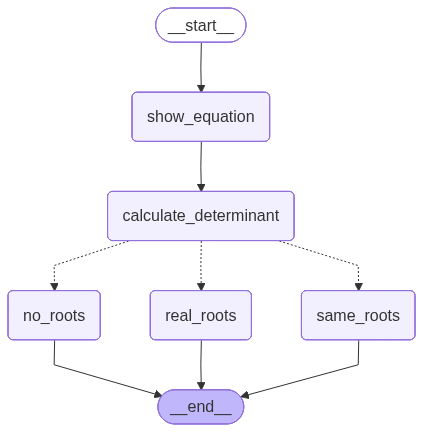

In [7]:
workflow

In [12]:
initial_state = {
    'a': 1, 
    'b':1,
    'c': -2
}

workflow.invoke(initial_state)

{'a': 1,
 'b': 1,
 'c': -2,
 'determinant': 9,
 'result': 'root1:1.0 , root2 :-2.0',
 'equation': '(1)x2+(1)x+(-2)'}